In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pyplot as bar
import math
import random

In [2]:
df = pd.read_csv('../toe_w.csv')
df

,lid,prefix,word,catorder,et,oflag,pflag,qflag,catid,t1,t2,t3,t4,t5,t6,t7,subcat,pos,heading
0,32169,NaN,wā,5,NaN,N,N,N,13963,8,1.0,3.0,4.0,1.0,NaN,NaN,02.02,in,Alas!
1,32347,NaN,wā (lā) wā,1,woe/wellaway/wellawo,N,N,N,14012,8,1.0,3.0,5.0,2.0,NaN,NaN,11,in,Ah!
2,32747,NaN,wā dōn,24,NaN,N,N,N,14112,8,1.0,3.0,7.0,2.0,NaN,NaN,13,v,"To afflict, vex, oppress"
3,32170,NaN,wā lā (wā),6,NaN,N,N,N,13963,8,1.0,3.0,4.0,1.0,NaN,NaN,02.02,in,Alas!
4,32164,NaN,wā lā (wā)/wei lā wei,1,wellawo/wellaway,N,N,N,13962,8,1.0,3.0,4.0,1.0,NaN,NaN,02.01,in,O!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,10752,NaN,wæxæppel,1,NaN,Y,N,N,4803,3,1.0,17.0,5.0,NaN,NaN,NaN,01,n,"A ball of wax, wax-apple"
3558,22849,NaN,wæþ,3,NaN,N,N,N,10275,5,12.0,1.0,3.0,3.0,NaN,NaN,01,n,A ford
3559,15238,NaN,wǣþan,8,NaN,N,N,N,6980,4,3.0,NaN,NaN,NaN,NaN,NaN,03,v,"To chase, hunt, drive"
3560,22658,NaN,wǣþan,8,NaN,N,N,N,10192,5,12.0,1.0,2.0,NaN,NaN,NaN,NaN,v,To wander


In [3]:
df_w = df[['word','t1']]
df_w_clean = df_w[df_w.word.str.match('^\\w+$')]
df_w_clean.columns = ['w', 't1']
df_w_clean

,w,t1
0,wā,8
5,wāc,3
6,wāc,3
7,wāc,5
8,wāc,5
...,...,...
3557,wæxæppel,3
3558,wæþ,5
3559,wǣþan,4
3560,wǣþan,5


In [4]:
cat_w = list(pd.DataFrame(df_w_clean.pivot_table(columns=['t1'], aggfunc=np.size, fill_value=0)).to_numpy()[0])
print(cat_w)

[193, 553, 164, 283, 347, 216, 146, 236, 118, 17, 135, 304, 126, 114, 75, 228, 66, 38]


In [5]:
# df1 = df.drop_duplicates(subset=['w'], keep='first')
# df1

In [6]:
df_s = pd.read_csv('../toe_s.csv')

In [7]:
df_s = df_s[['word','t1']]
df_s_clean = df_s[df_s.word.str.match('^\\w+$')]
df_s_clean.columns = ['s', 't1']
df_s_clean

,s,t1
0,sā,4
1,saban,4
2,sabbat,16
4,sacan,9
5,sacan,12
...,...,...
4890,sǣȳþ,1
4891,sǣæbbung,1
4892,sǣǣl,2
4893,sǣælfen,16


In [8]:
# df3 = df2.drop_duplicates(subset=['s'], keep='first')
# df3

In [9]:
cat_s = list(pd.DataFrame(df_s_clean.pivot_table(columns=['t1'], aggfunc=np.size, fill_value=0)).to_numpy()[0])
print(cat_s)

[335, 809, 327, 478, 707, 264, 64, 202, 157, 34, 150, 246, 185, 106, 64, 275, 113, 70]


In [10]:
df_h = pd.read_csv('h words.csv')
cat_h = [len(df_h[df_h['categories'].map(lambda x: x.startswith(i))]) for i in ('{:02}'.format(v) for v in range(1,19))]
print(cat_h)

[247, 932, 261, 514, 658, 222, 167, 307, 69, 67, 214, 318, 234, 105, 66, 698, 88, 43]


In [11]:
df_p = pd.read_csv('p words.csv')
cat_p = [len(df_p[df_p['categories'].map(lambda x: x.startswith(i))]) for i in ('{:02}'.format(v) for v in range(1,19))]
print(cat_p)

[25, 109, 23, 76, 53, 15, 26, 9, 14, 0, 16, 14, 5, 10, 11, 75, 27, 34]


In [12]:
cat_s

[335,
 809,
 327,
 478,
 707,
 264,
 64,
 202,
 157,
 34,
 150,
 246,
 185,
 106,
 64,
 275,
 113,
 70]

In [13]:
final_table = [[cat_w[i],cat_s[i], cat_h[i], cat_p[i]] for i in range(len(cat_w))]
final_table

[[193, 335, 247, 25],
 [553, 809, 932, 109],
 [164, 327, 261, 23],
 [283, 478, 514, 76],
 [347, 707, 658, 53],
 [216, 264, 222, 15],
 [146, 64, 167, 26],
 [236, 202, 307, 9],
 [118, 157, 69, 14],
 [17, 34, 67, 0],
 [135, 150, 214, 16],
 [304, 246, 318, 14],
 [126, 185, 234, 5],
 [114, 106, 105, 10],
 [75, 64, 66, 11],
 [228, 275, 698, 75],
 [66, 113, 88, 27],
 [38, 70, 43, 34]]

In [14]:
final_table1 = pd.DataFrame(final_table, columns=['w', 's', 'h', 'p'])
final_table1.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
w,193,553,164,283,347,216,146,236,118,17,135,304,126,114,75,228,66,38
s,335,809,327,478,707,264,64,202,157,34,150,246,185,106,64,275,113,70
h,247,932,261,514,658,222,167,307,69,67,214,318,234,105,66,698,88,43
p,25,109,23,76,53,15,26,9,14,0,16,14,5,10,11,75,27,34


([<matplotlib.axis.XTick at 0x7f11340b8dd8>,
 <a list of 18 Text xticklabel objects>)

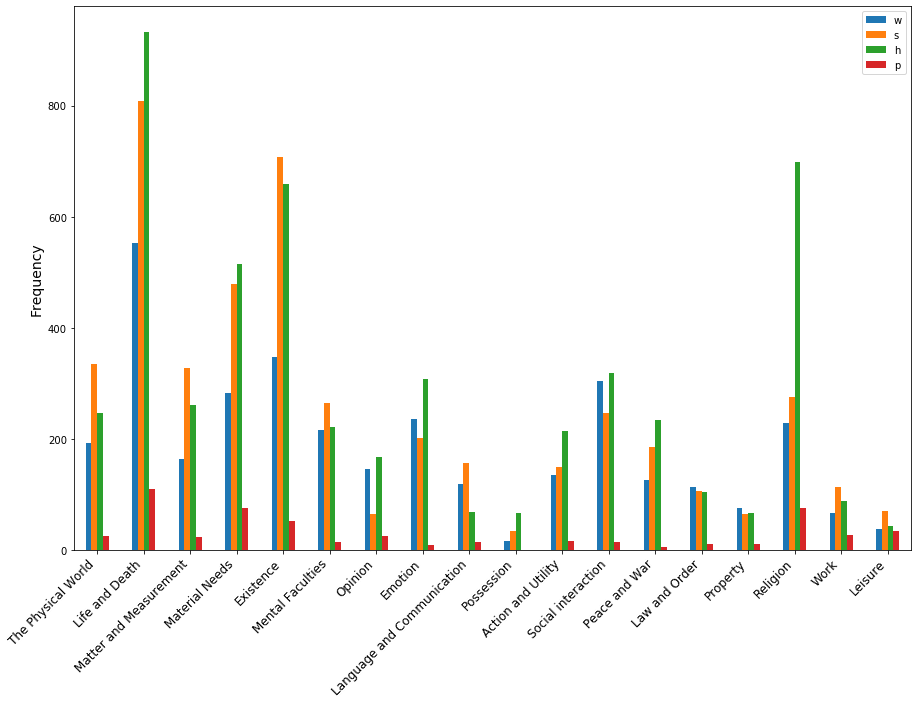

In [65]:
final_table1.plot(kind='bar', figsize=(15, 10))
plt.ylabel('Frequency', fontsize=14)
# plt.xlabel('Semantic Categories')
names = ["The Physical World", "Life and Death", "Matter and Measurement", "Material Needs", "Existence", "Mental Faculties", "Opinion", "Emotion", "Language and Communication", "Possession", "Action and Utility", "Social interaction", "Peace and War", "Law and Order", "Property", "Religion", "Work", "Leisure"]
y_pos = np.arange(len(names))
plt.xticks(y_pos, names, rotation=45, horizontalalignment="right",fontsize=12)

In [16]:
chi2_contingency (final_table)

(765.665150420889,
 3.637296031842976e-128,
 51,
 array([[196.18894648, 267.85427466, 304.30021173,  31.65656713],
        [589.302548  , 804.56727751, 914.04176097,  95.08841352],
        [190.05804191, 259.48382858, 294.79083011,  30.66729941],
        [331.31408338, 452.33890633, 513.88698255,  53.46002774],
        [432.84186318, 590.95349347, 671.36234212,  69.84230123],
        [175.83434329, 240.06439366, 272.72906476,  28.37219829],
        [ 98.83018179, 134.93159086, 153.29123166,  15.94699569],
        [184.90808206, 252.45265387, 286.80294955,  29.83631452],
        [ 87.79455355, 119.86478791, 136.17434475,  14.16631379],
        [ 28.93786961,  39.50850551,  44.88428123,   4.66934365],
        [126.2966343 , 172.43118931, 195.8932613 ,  20.37891509],
        [216.2983135 , 295.30933781, 335.49098343,  34.90136526],
        [134.87990071, 184.14981383, 209.20639556,  21.7638899 ],
        [ 82.15412134, 112.16397751, 127.42571366,  13.25618749],
        [ 52.97101555,  72.

In [17]:
final_table1.to_csv('final_table.csv')

In [18]:
table = sm.stats.Table(final_table)
# print(table.table_orig)

In [19]:
print(table.fittedvalues)

[[196.181785   267.84449717 304.28910385  31.68461398]
 [589.28103669 804.53790838 914.00839569  95.17265924]
 [190.05110422 259.47435663 294.78006936  30.69446979]
 [331.30198941 452.3223946  513.86822413  53.50739186]
 [432.82606315 590.93192188 671.33783537  69.90417959]
 [175.8279248  240.05563059 272.71910933  28.39733528]
 [ 98.82657419 134.92666545 153.28563606  15.96112429]
 [184.90133236 252.44343858 286.79248038  29.86274868]
 [ 87.79134879 119.86041248 136.16937397  14.17886476]
 [ 29.0594269   39.67446614  45.07282351   4.69328345]
 [126.29202409 172.42489505 195.8861106   20.39697025]
 [216.29041796 295.29855813 335.478737    34.93228691]
 [134.87497719 184.14309181 209.1987589   21.78317211]
 [ 82.15112247 112.15988319 127.42106224  13.2679321 ]
 [ 52.96908195  72.31801424  82.15805804   8.55484577]
 [312.90994707 427.21197299 485.34112064  50.5369593 ]
 [ 72.09680599  98.43285271 111.82624567  11.64409564]
 [ 45.36703778  61.93903997  70.36685527   7.32706698]]


In [20]:
pd.DataFrame(table.chi2_contribs).to_csv('chi2_contribs.csv')

In [21]:
def lvova(a,b,c,d):
    return (a*d-b*c)**2*(a+b+c+d)/((a+c)*(b+d)*(a+b)*(c+d))

def chi2(a,b,c,d):
    x2 = chi2_contingency([[a,b],[c,d]], False)
    f = math.sqrt(x2[0]/total_sum)
    pos = a > x2[3][0][0]
    fp = f if pos else "" 
    return a, lvova(a,b,c,d), (*(x2)[:-2]), fp, pos

def get_abcd(table, row, column):
    total_column = sum([r[column] for r in table])
    a = table[row][column]
    b = sum(table[row]) - a
    c = total_column - a
    d = (total_sum - total_column) - b
    return a, b, c, d

def get_v(table, row, f=chi2):
    return [f(*get_abcd(table, row, column)) for column in range(len(table[0]))]

total_sum = sum([sum(r) for r in final_table])
chi2_table = [get_v(final_table, row) for row in range(len(cat_w))]
chi2_table[0][0]
# [[c[2] for c in r] for r in chi2_table]

(193, 0.07293661623897041, 0.07293661623896969, 0.7871080943342209, '', False)

In [22]:
def with_index(table, columns):
    index = ['The Physical World', 'Life and Death', 'Matter and Measurement', 'Material Needs', 'Existence', 'Mental Faculties', 'Opinion', 'Emotion', 'Language and Communication', 'Possession', 'Action and Utility', 'Social interaction', 'Peace and War', ' Law and Order', 'Property', 'Religion', 'Work', 'Leisure']
    return pd.DataFrame(table, index, columns)    
def get_word(c):
    return with_index([r[c] for r in chi2_table], ['num_words', 'lvova', 'ch2','p-value','fi','fi_pos'])
# get_word(0)
t = [[r[0][2],r[0][3], r [0][4], r[1][2], r[1][3], r[1][4], r[2][2], r[2][3], r[2][4], r[3][2], r[3][3], r[3][4]] for r in chi2_table]
final = with_index(t, pd.MultiIndex.from_product([["w", "s", "h", "p"], ["chi2", "p-value", "phi"]])) 
final

w                                    s  \
                                 chi2       p-value         phi       chi2   
The Physical World           0.072937  7.871081e-01              26.874124   
Life and Death               3.593375  5.801033e-02               0.044526   
Matter and Measurement       5.017437  2.509328e-02              27.993709   
Material Needs              10.356087  1.290484e-03               2.427979   
Existence                   25.892271  3.610116e-07              39.326243   
Mental Faculties            12.827610  3.415418e-04   0.0306027   3.785919   
Opinion                     30.732474  2.961668e-08   0.0473681  57.755713   
Emotion                     19.793744  8.626456e-06   0.0380147  16.041243   
Language and Communication  14.138198  1.698594e-04    0.032128  17.759952   
Possession                   6.581634  1.030363e-02               1.164646   
Action and Utility           0.825688  3.635225e-01  0.00776417   4.558189   
Social interaction          50.356847  1.281821e-12    0.060634  13.229621   
Peace and War                0.806969  3.690180e-01               0.006148   
 Law and Order              16.765636  4.229231e-05   0.0349862   0.522014   
Property                    12.332267  4.451954e-04    0.030006   1.462229   
Religion                    33.671044  6.526500e-09              89.919866   
Work                         0.698651  4.032374e-01               3.310257   
Leisure                      1.607383  2.048600e-01               1.597772   

                                                                h  \
                                 p-value          phi        chi2   
The Physical World          2.171468e-07     0.044295   18.493462   
Life and Death              8.328776e-01     0.001803    0.690574   
Matter and Measurement      1.217105e-07    0.0452082    6.625989   
Material Needs              1.191865e-01     0.013314    0.000045   
Existence                   3.585893e-10    0.0535832    0.492710   
Mental Faculties            5.168553e-02    0.0166254   16.069572   
Opinion                     2.967768e-14                 2.038546   
Emotion                     6.197762e-05                 2.429148   
Language and Communication  2.506031e-05    0.0360088   54.914245   
Possession                  2.805040e-01                17.739312   
Action and Utility          3.276170e-02                 2.806573   
Social interaction          2.755595e-04                 1.572989   
Peace and War               9.375039e-01  0.000669954    4.940540   
 Law and Order              4.699839e-01                 6.529211   
Property                    2.265758e-01                 5.212525   
Religion                    2.480042e-21               165.795172   
Work                        6.884874e-02     0.015546    8.375199   
Leisure                     2.062193e-01    0.0108005   17.415037   

                                                                p  \
                                 p-value          phi        chi2   
The Physical World          1.704882e-05                 1.547776   
Life and Death              4.059691e-01   0.00710056    2.570029   
Matter and Measurement      1.005013e-02                 2.115630   
Material Needs              9.946773e-01  5.70012e-05   10.977700   
Existence                   4.827208e-01                 4.854351   
Mental Faculties            6.105727e-05                 6.924653   
Opinion                     1.533561e-01    0.0121997    6.798565   
Emotion                     1.190976e-01    0.0133172   16.033256   
Language and Communication  1.259051e-13                 0.002088   
Possession                  2.533368e-05    0.0359878    4.903973   
Action and Utility          9.387872e-02    0.0143145    1.017960   
Social interaction          2.097735e-01                13.929911   
Peace and War               2.623384e-02    0.0189922   14.007043   
 Law and Order              1.061170e-02                 0.

In [23]:
final.to_csv('final_w_s_h.csv')

# w statistics

In [24]:
get_word(0)

,num_words,lvova,ch2,p-value,fi,fi_pos
The Physical World,193,0.072937,0.072937,7.871081e-01,,False
Life and Death,553,3.593375,3.593375,5.801033e-02,,False
Matter and Measurement,164,5.017437,5.017437,2.509328e-02,,False
Material Needs,283,10.356087,10.356087,1.290484e-03,,False
Existence,347,25.892271,25.892271,3.610116e-07,,False
Mental Faculties,216,12.827610,12.827610,3.415418e-04,0.0306027,True
Opinion,146,30.732474,30.732474,2.961668e-08,0.0473681,True
Emotion,236,19.793744,19.793744,8.626456e-06,0.0380147,True
Language and Communication,118,14.138198,14.138198,1.698594e-04,0.032128,True
Possession,17,6.581634,6.581634,1.030363e-02,,False


# s statistics

In [25]:
get_word(1)

,num_words,lvova,ch2,p-value,fi,fi_pos
The Physical World,335,26.874124,26.874124,2.171468e-07,0.044295,True
Life and Death,809,0.044526,0.044526,8.328776e-01,0.001803,True
Matter and Measurement,327,27.993709,27.993709,1.217105e-07,0.0452082,True
Material Needs,478,2.427979,2.427979,1.191865e-01,0.013314,True
Existence,707,39.326243,39.326243,3.585893e-10,0.0535832,True
Mental Faculties,264,3.785919,3.785919,5.168553e-02,0.0166254,True
Opinion,64,57.755713,57.755713,2.967768e-14,,False
Emotion,202,16.041243,16.041243,6.197762e-05,,False
Language and Communication,157,17.759952,17.759952,2.506031e-05,0.0360088,True
Possession,34,1.164646,1.164646,2.805040e-01,,False


# h statistics

In [26]:
get_word(2)

,num_words,lvova,ch2,p-value,fi,fi_pos
The Physical World,247,18.493462,18.493462,1.704882e-05,,False
Life and Death,932,0.690574,0.690574,4.059691e-01,0.00710056,True
Matter and Measurement,261,6.625989,6.625989,1.005013e-02,,False
Material Needs,514,0.000045,0.000045,9.946773e-01,5.70012e-05,True
Existence,658,0.492710,0.492710,4.827208e-01,,False
Mental Faculties,222,16.069572,16.069572,6.105727e-05,,False
Opinion,167,2.038546,2.038546,1.533561e-01,0.0121997,True
Emotion,307,2.429148,2.429148,1.190976e-01,0.0133172,True
Language and Communication,69,54.914245,54.914245,1.259051e-13,,False
Possession,67,17.739312,17.739312,2.533368e-05,0.0359878,True


# p statistics

In [27]:
get_word(3)

,num_words,lvova,ch2,p-value,fi,fi_pos
The Physical World,25,1.547776,1.547776,2.134640e-01,,False
Life and Death,109,2.570029,2.570029,1.089057e-01,0.013698,True
Matter and Measurement,23,2.115630,2.115630,1.458021e-01,,False
Material Needs,76,10.977700,10.977700,9.221480e-04,0.0283102,True
Existence,53,4.854351,4.854351,2.757649e-02,,False
Mental Faculties,15,6.924653,6.924653,8.501550e-03,,False
Opinion,26,6.798565,6.798565,9.123118e-03,0.022279,True
Emotion,9,16.033256,16.033256,6.223957e-05,,False
Language and Communication,14,0.002088,0.002088,9.635576e-01,,False
Possession,0,4.903973,4.903973,2.679497e-02,,False
